## Домашнее задание "Сегментация и детекция объектов"

Задание:
Распознавание рукописного ввода на примере базы MNIST

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline


In [6]:
labeled_images = pd.read_csv('data/digit/train.csv')
images = labeled_images.iloc[0:5000, 1:]
labels = labeled_images.iloc[0:5000, :1]
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, train_size=0.8, random_state=0)


Text(0.5, 1.0, '6')

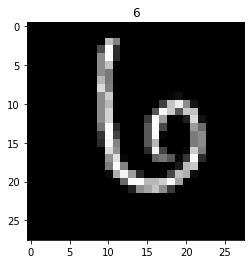

In [7]:
i = 1
img = train_images.iloc[i].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i, 0])


(array([682.,   9.,  10.,   7.,  10.,  18.,   7.,  17.,   7.,  17.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

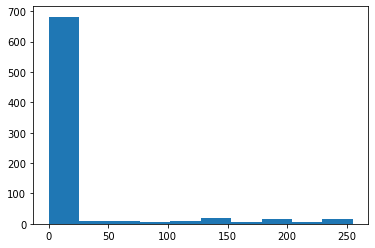

In [8]:
plt.hist(train_images.iloc[i])


In [9]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)


0.942

<ipython-input-13-17c2ca77bc0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_images[test_images > 0] = 1
C:\Users\ivano\anaconda3\lib\site-packages\pandas\core\frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
<ipython-input-13-17c2ca77bc0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

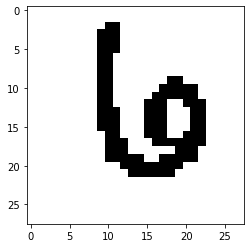

In [13]:
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1

img = train_images.iloc[i].to_numpy().reshape((28, 28))
plt.imshow(img, cmap='binary')


(array([668.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

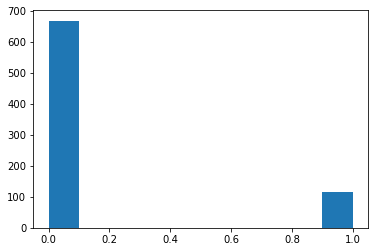

In [14]:
plt.hist(train_images.iloc[i])


In [15]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)


0.929

In [16]:
test_data = pd.read_csv('data/digit/test.csv')
test_data[test_data > 0] = 1
results = clf.predict(test_data)


In [17]:
results


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [18]:
df = pd.DataFrame(results)
df.index.name = 'ImageId'
df.index += 1
df.columns = ['Label']
df.to_csv('results.csv', header=True)


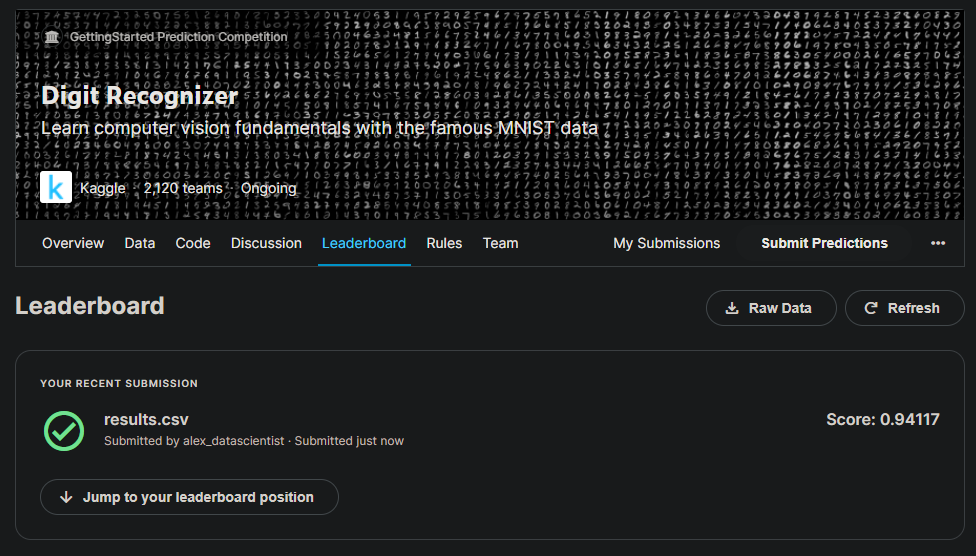

In [19]:
from IPython.display import Image
Image(filename='submission_score.png')
